Plan:
 * 3-minute introduction to Neural Networks
  * A sequence of operations
  * or in details DAG
  * Training: backpropagation
 * Convolution layers:
  * Motivation:
    * FFT?
    * Filters?
  * Params:
    * Paddings
    * spartial conv
    * Layers
    * formula
    * kernel dims
  * Convnets in CV:
    * MNIST
  * Convnets in NLP:
    * character-level LM

# Sieci Konwolucyjne w przetwarzaniu obrazów i tekstu

### Tomasz Dwojak

### 24 kwietnia 2018

### Wprowadzenie do NNs

 * podstawowe klocki: warstawy
 * układanie puzzli z klocków
 * wejście: $x \in {R}^{n \cdot m \cdot k \cdot l}$ - [tensor](https://stats.stackexchange.com/questions/198061/why-the-sudden-fascination-with-tensors):
  * 0D tensor to skalar,
  * 1D tensor to wektor,
  * 2D tensor to macierz...
  * 4D tensor to *macierz macierzy*

In [26]:
import os
import struct
import numpy as np

def readMnist(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
        img = img.astype(np.float32)

    get_img = lambda idx: (lbl[idx], img[idx])

    return [get_img(i) for i in range(len(lbl))]

In [27]:
def showImage(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [30]:
training = readMnist()
print(training[0][1].shape)

(28, 28)


Warstwy (ang. *layers*):
 * liniowa: $ x \leftarrow xW + b$
 * element-wise: $ x\cdot W$
 * nieliniowe (f. aktywacji): np. $x \leftarrow \tanh(x)$, $x \leftarrow \sigma(x)$, $\DeclareMathOperator{\relu}{ReLU} x \leftarrow \relu(x)$
 * pooling:, np. max-pooling, ave-pooling
 * RNN: LSTM, GRU
 * Konwolucyjna: $x * W$

### Training

 * forward
 * computing loss function, e.g. MSE, CE
 * backward (back propagation)
 * update weights
 * repeat til some condition...

In [32]:
def train_epoch(model, criterion, optimizer):
    model.train()
    for batch in batch_generator():
        optimizer.zero_grad()
        
        inputs = Variable(torch.from_numpy(batch[0]))
        labels = Variable(torch.from_numpy(batch[1]))
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

### Images in ML

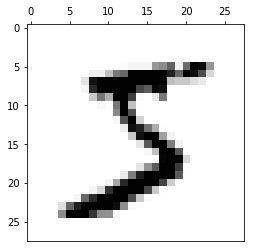

In [20]:
showImage(training[0][1])

In [31]:
example = ''
print('\n'.join([''.join([str(int(bool(col))) for col in row]) for row in training[0][1]]))

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000001111111111110000
0000000011111111111111110000
0000000111111111111111100000
0000000111111111110000000000
0000000011111110110000000000
0000000001111100000000000000
0000000000011110000000000000
0000000000011110000000000000
0000000000001111110000000000
0000000000000111111000000000
0000000000000011111100000000
0000000000000001111100000000
0000000000000000011110000000
0000000000000011111110000000
0000000000001111111100000000
0000000000111111111000000000
0000000011111111110000000000
0000001111111111000000000000
0000111111111100000000000000
0000111111110000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


### Convolutions

$$
s(t) = \int_{-\infty}^{+\infty}{x(a)w(t-a)da}
$$

$$
s(t) = (x * w)(t)
$$

$$
s(t) = \sum_{a=-\infty}^{\infty}{x(a)w(t-a)}
$$

$$
S(i, j) = (I * K)(i,j) = \sum_{m}\sum_{n}{I(m,n) \cdot K(i-m,j-n)}
$$

$$
S(i, j) = (K * I)(i,j) = \sum_{m}\sum_{n}{I(i-m, j-n) \cdot K(m,n)}
$$

$$
S(i, j) = (K * I)(i,j) = \sum_{m}\sum_{n}{I(i+m, j+n) \cdot K(m,n)}
$$

$$
S(i, j) = (K * I)(i,j) = b + \sum_{m}{\sum_{n}{I(i+m, j+n) \cdot K(m,n)}}
$$

### Convnets

Previously, we had to find filters (a.k.a. kernels) manually:

<center>![](FirstPixelMulitiplication.png)</center>

<center>![](./Convolution_schematic.gif)</center>

In [63]:
kernel = [0.0, 1.0, 0.0,
          1.0, 0.0, 1.0,
          0.0, 1.0, 0.0]

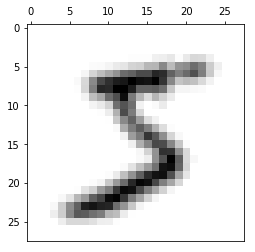

In [64]:
inputs = Variable(torch.from_numpy(training[0][1])).unsqueeze(0).unsqueeze(0)
vertical = nn.Conv2d(1, 1, 3, padding=1, bias=False)
vertical.weight.data = torch.from_numpy(np.array(kernel, dtype=np.float32).reshape((1, 1, 3, 3)))
output = vertical(inputs)
showImage(output.data.numpy().reshape((28, 28)) / 3)

### Convnets and DL

let NN to learn its own filters!

$$
Convnet \rightarrow activation \rightarrow pooling
$$

<center>![](./LeNet.png)</center>

In [67]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, (5,5), padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### AlexNet
![](./AlexNet.png)

 * Trained the network on ImageNet data, which contained over 15 million annotated images from a total of over 22,000 categories.
 * Used ReLU for the nonlinearity functions (Found to decrease training time as ReLUs are several times faster than the conventional tanh function).
 * Used data augmentation techniques that consisted of image translations, horizontal reflections, and patch extractions.
 * Implemented dropout layers in order to combat the problem of overfitting to the training data.
 * Trained the model using batch stochastic gradient descent, with specific values for momentum and weight decay.
 * Trained on two GTX 580 GPUs for five to six days.

<center>![](./weights.jpeg)</center>

### GoogLeNet
<center>![](./GoogLeNet.png)</center>

## Inception
<center>![](./GoogLeNet3.png)</center>

### And deeper
 * ResNet (157 layers)
 * GANs
 * and many more...

<center>![](./Encoder7-1.png)</center>

### LSTM: Long Short Term Memory
![](./LSTM3-chain.png)

### Character level Language Model
<center>![](./network.png)</center>

### FAIR seq

<center>![](./fair.png)</center>

In [60]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_recall_fscore_support
from torch import nn, optim
from torch.autograd import Variable
from torch.nn.utils import weight_norm
from torch.utils.data import DataLoader, TensorDataset

### Bibliography and sources

 * [Course on Stanford](https://cs231n.github.io/convolutional-networks/)
 * [adeshpande3.github.io](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)
 * [UFLDL](http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/)
 * [Chapter on CNN in Deep Learning book](http://www.deeplearningbook.org/contents/convnets.html)
 * [AlexNet Paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

### That's all for today!

### Questions? 